In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [109]:
data_frame =pd.read_csv('D:\ML Hackthon\Intellihack_DeepMinds_04\question4-stock-data.csv')

In [110]:
data_frame.head()

,Unnamed: 0,Date,Adj Close,Close,High,Low,Open,Volume
0,0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [111]:
data_frame.shape

(11291, 8)

In [112]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11291 entries, 0 to 11290
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  11291 non-null  int64  
 1   Date        11181 non-null  object 
 2   Adj Close   11198 non-null  float64
 3   Close       11174 non-null  float64
 4   High        11196 non-null  float64
 5   Low         11164 non-null  float64
 6   Open        11188 non-null  float64
 7   Volume      11146 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 705.8+ KB


In [113]:
data_frame.describe()

,Unnamed: 0,Adj Close,Close,High,Low,Open,Volume
count,11291.000000,11198.000000,11174.000000,11196.000000,11164.000000,11188.000000,1.114600e+04
mean,5645.000000,63.609130,72.026945,72.503100,71.665079,67.999259,2.144157e+05
std,3259.575279,52.266247,51.259828,51.550735,51.011632,55.834401,3.883662e+05
min,0.000000,2.259452,3.237711,3.237711,3.237711,0.000000,0.000000e+00
25%,2822.500000,19.224636,27.500000,27.789255,27.536156,0.000000,1.350000e+04
50%,5645.000000,50.608900,66.035000,66.724998,65.418751,66.065002,9.032350e+04
75%,8467.500000,104.723621,114.297503,114.892500,113.639999,114.269997,2.915750e+05
max,11290.000000,254.770004,254.770004,255.229996,253.589996,255.000000,1.858270e+07


In [114]:
data_frame.drop(columns=['Unnamed: 0'],inplace=True, errors='ignore')

In [115]:
data_frame.head()

,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


In [116]:
data_frame['Date'] = pd.to_datetime(data_frame['Date'], errors='coerce')

In [117]:
# features=['Adj Close', 'Close', 'High', 'Low',  'Open','Volume']
# for(feature) in features:
#     plt.figure()
#     plt.hist(data_frame[feature], bins=20, edgecolor='black')
#     plt.title(f'Histogram of {feature}')
#     plt.xlabel(feature)
#     plt.ylabel("Frequency")
#     plt.show()

In [118]:
data_frame.isnull().sum()

Date         110
Adj Close     93
Close        117
High          95
Low          127
Open         103
Volume       145
dtype: int64

In [119]:
data_imputed = data_frame.copy()
cols_to_impute = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
data_imputed[cols_to_impute] = data_imputed[cols_to_impute].fillna(data_imputed[cols_to_impute].mean())

In [120]:
data_imputed.loc[:, "Date"] = data_imputed["Date"].ffill()

In [121]:
data_imputed.isnull().sum()

Date         0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [122]:
data_imputed.head()


,Date,Adj Close,Close,High,Low,Open,Volume
0,1980-03-17,2.296798,3.291227,3.344743,3.291227,0.000000,41109.0
1,1980-03-18,2.306134,3.304606,3.358122,3.304606,0.000000,9343.0
2,1980-03-19,2.306134,3.304606,3.304606,3.304606,3.304606,0.0
3,1980-03-20,2.306134,3.304606,3.358122,3.304606,0.000000,10277.0
4,1980-03-21,2.362154,3.384880,3.438396,3.384880,0.000000,8409.0


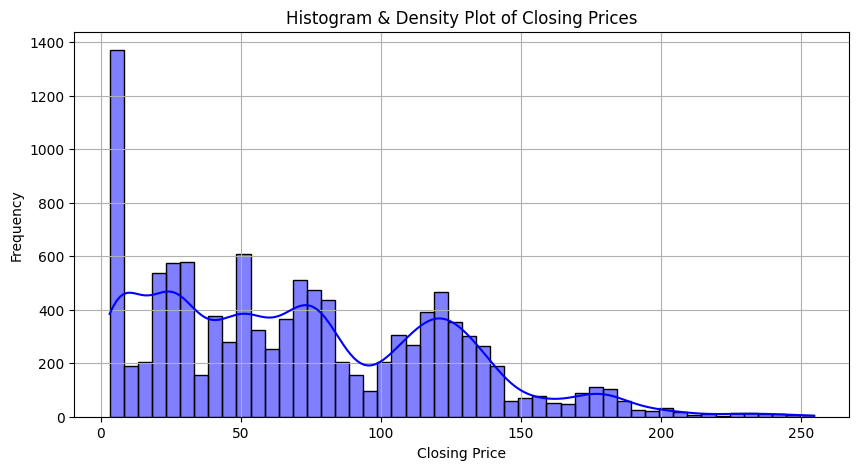

In [123]:
# Histograms & Density Plots
plt.figure(figsize=(10,5))
sns.histplot(data_imputed["Close"], bins=50, kde=True, color='blue')
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Histogram & Density Plot of Closing Prices")
plt.grid()
plt.show()

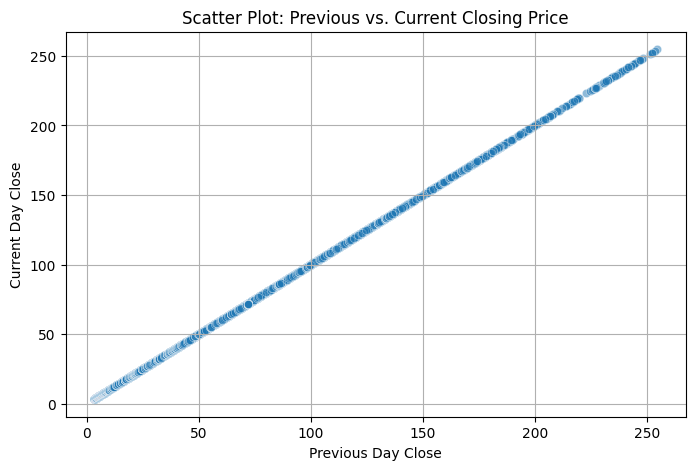

In [124]:
# Scatter Plots to examine relationships between pairs of continuous variables
plt.figure(figsize=(8,5))
sns.scatterplot(x=data_imputed["Close"], y=data_imputed["Close"], alpha=0.5)
plt.xlabel("Previous Day Close")
plt.ylabel("Current Day Close")
plt.title("Scatter Plot: Previous vs. Current Closing Price")
plt.grid()
plt.show()

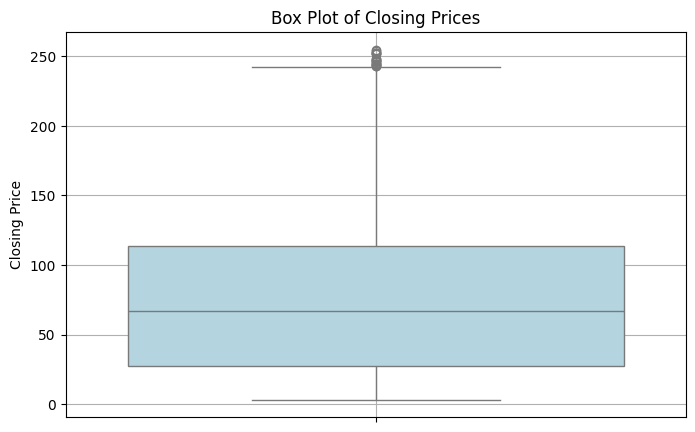

In [125]:
# Box Plot to Detect Outliers
plt.figure(figsize=(8,5))
sns.boxplot(y=data_imputed["Close"], color='lightblue')
plt.ylabel("Closing Price")
plt.title("Box Plot of Closing Prices")
plt.grid()
plt.show()

In [126]:
data_imputed["MA_7"] = data_imputed["Close"].rolling(window=7).mean()
data_imputed["MA_30"] = data_imputed["Close"].rolling(window=30).mean()

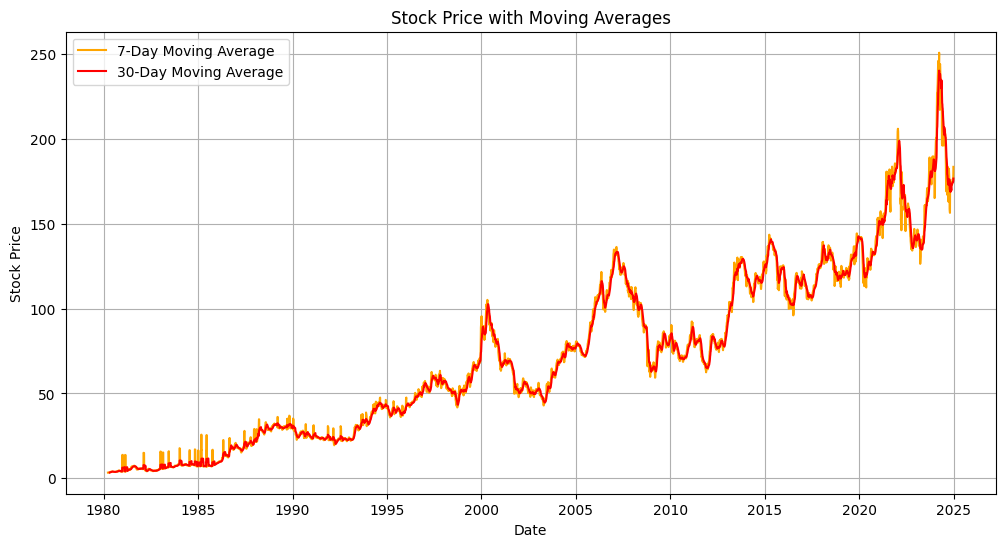

In [127]:
plt.figure(figsize=(12,6))
# plt.plot(data_imputed["Date"], data_imputed["Close"], label="Close Price", color='blue', alpha=0.5)
plt.plot(data_imputed["Date"], data_imputed["MA_7"], label="7-Day Moving Average", color='orange')
plt.plot(data_imputed["Date"], data_imputed["MA_30"], label="30-Day Moving Average", color='red')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.grid()
plt.show()

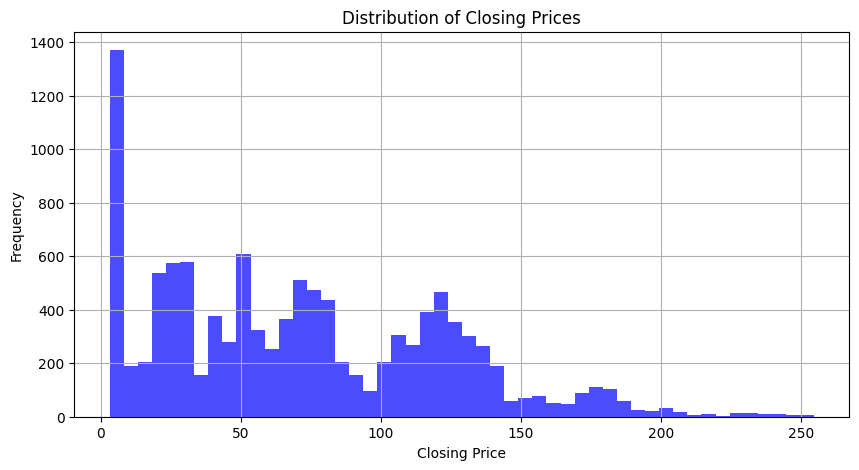

In [128]:
# Checking the distribution of the stock prices
plt.figure(figsize=(10,5))
plt.hist(data_imputed["Close"].dropna(), bins=50, color='blue', alpha=0.7)
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.title("Distribution of Closing Prices")
plt.grid()
plt.show()

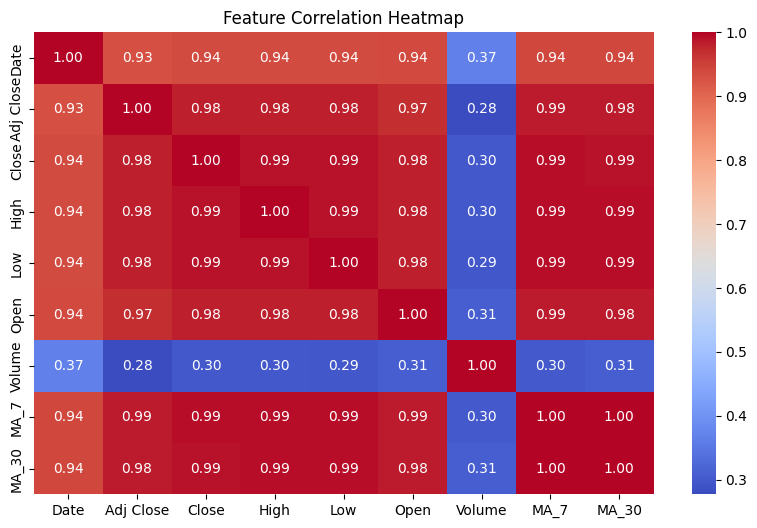

In [129]:
plt.figure(figsize=(10,6))
sns.heatmap(data_imputed.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


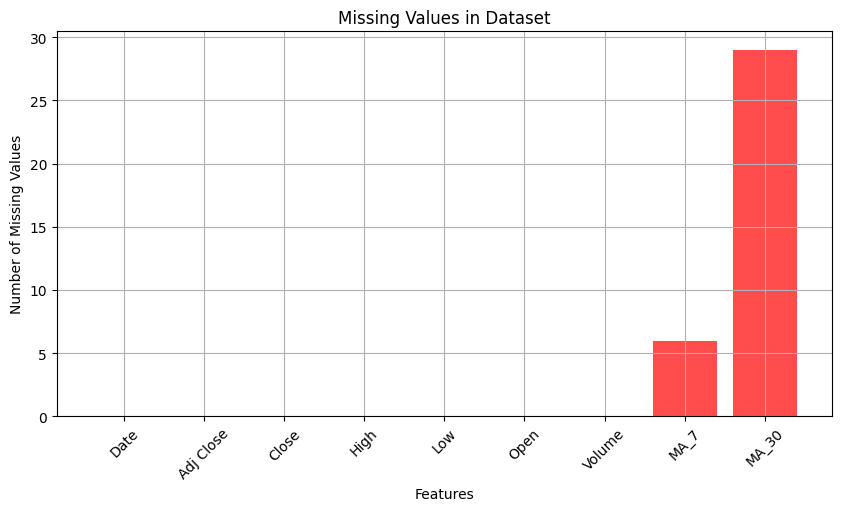

In [130]:
# Identifying missing data points visually
plt.figure(figsize=(10, 5))
plt.bar(data_imputed.columns, data_imputed.isnull().sum(), color='red', alpha=0.7)
plt.xlabel("Features")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values in Dataset")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [135]:
# Feature Engineering

# Creating Lag Features (Using past values as predictors)
data_imputed["Close_Lag_1"] = data_imputed["Close"].shift(1)
data_imputed["Close_Lag_5"] = data_imputed["Close"].shift(5)

In [136]:
data_imputed["Daily_Return"] = data_imputed["Close"].pct_change()

In [137]:
data_imputed.isnull().sum()

Date             0
Adj Close        0
Close            0
High             0
Low              0
Open             0
Volume           0
MA_7             6
MA_30           29
Close_Lag_1      1
Close_Lag_5      5
Daily_Return     1
dtype: int64

In [139]:
data_imputed.shape

(11291, 12)

In [140]:
data_clean=data_imputed.copy()
data_clean=data_imputed.dropna(inplace=True)

In [141]:
data_imputed.head()

,Date,Adj Close,Close,High,Low,Open,Volume,MA_7,MA_30,Close_Lag_1,Close_Lag_5,Daily_Return
29,1980-04-28,2.502202,3.585565,3.639081,3.585565,0.000000,2803.0,3.488089,3.374623,3.545428,3.425017,0.011321
30,1980-04-29,2.539549,3.639081,3.692597,3.639081,0.000000,74744.0,3.518670,3.386218,3.585565,3.425017,0.014925
31,1980-04-30,2.548885,3.652460,3.705975,3.652460,0.000000,3737.0,3.551162,3.397813,3.639081,3.491912,0.003677
32,1980-05-01,2.558223,3.665839,3.719354,3.665839,0.000000,934.0,3.585565,3.409854,3.652460,3.518670,0.003663
33,1980-05-02,2.558223,3.665839,3.665839,3.665839,3.665839,0.0,3.610412,3.421895,3.665839,3.545428,0.000000


In [143]:
data_imputed.reset_index(drop=True , inplace = True)

In [168]:
data_imputed.shape

(11262, 12)

In [145]:
features = ["Close_Lag_1", "Close_Lag_5", "Daily_Return"]
target = "Close"

In [146]:
X = data_imputed[features]
y = data_imputed[target]

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
# Standardizing the feature values to ensure equal scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [149]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [150]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [160]:
# Evaluate the model performance using RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 7.226865233381847


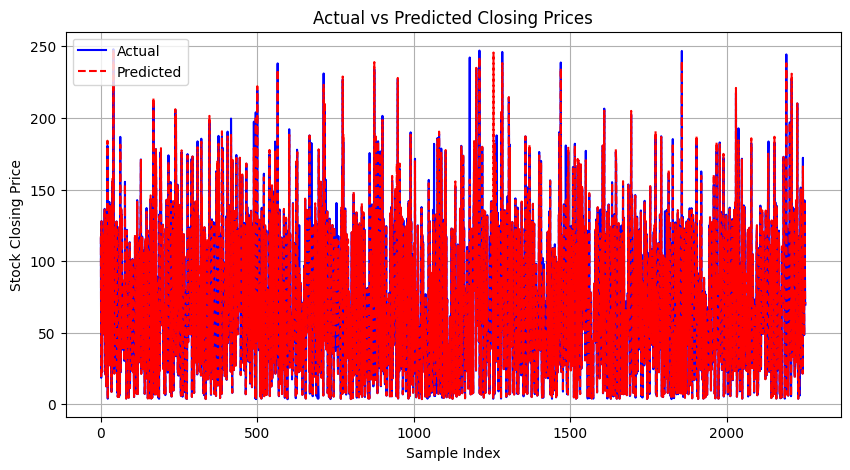

In [159]:
# Plot Actual vs. Predicted Prices
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", color='blue')
plt.plot(y_pred, label="Predicted", color='red', linestyle='dashed')
plt.xlabel("Sample Index")
plt.ylabel("Stock Closing Price")
plt.title("Actual vs Predicted Closing Prices")
plt.legend()
plt.grid()
plt.show()

In [156]:
# Convert actual and predicted values into a Pandas Series
actual_series = pd.Series(y_test.values, index=y_test.index).reset_index(drop=True)
predicted_series = pd.Series(y_pred, index=y_test.index).reset_index(drop=True)

In [161]:
actual_direction = (actual_series.diff() > 0).astype(int)  # 1 if price went up, 0      if down
predicted_direction = (predicted_series.diff() > 0).astype(int)  # 1 if predicted price went up, 0 if down

In [162]:
directional_accuracy = (actual_direction == predicted_direction).mean() * 100

In [163]:
print(f"Directional Accuracy: {directional_accuracy:.2f}%")

Directional Accuracy: 98.27%


In [165]:
# Simulating Trading Strategy Performance
initial_balance = 10000  # Starting cash
cash = initial_balance
stocks = 0  # Number of stocks owned
trade_log = []  # Store trade history

for i in range(len(y_test) - 1):  # Iterate over test set
    actual_price_today = y_test.iloc[i]
    actual_price_tomorrow = y_test.iloc[i + 1]
    predicted_price_tomorrow = y_pred[i + 1]

    if predicted_price_tomorrow > actual_price_today and cash >= actual_price_today:
        # Buy 1 stock
        stocks += 1
        cash -= actual_price_today
        trade_log.append(f"BUY at {actual_price_today:.2f}")

    elif predicted_price_tomorrow < actual_price_today and stocks > 0:
        # Sell 1 stock
        stocks -= 1
        cash += actual_price_today
        trade_log.append(f"SELL at {actual_price_today:.2f}")

# Final Portfolio Value
final_value = cash + (stocks * y_test.iloc[-1])
profit = final_value - initial_balance

# Print Trading Summary
print("\nTrading Simulation Summary:")
print(f"Final Portfolio Value: ${final_value:.2f}")
print(f"Total Profit/Loss: ${profit:.2f}")
print(f"Total Trades Executed: {len(trade_log)}")

# Show Trade Log (First 10 trades)
print("\nSample Trades:")
print("\n".join(trade_log[:10]))



Trading Simulation Summary:
Final Portfolio Value: $73754.71
Total Profit/Loss: $63754.71
Total Trades Executed: 2240

Sample Trades:
BUY at 18.55
SELL at 127.98
BUY at 22.75
SELL at 118.59
BUY at 48.88
SELL at 80.54
BUY at 49.00
BUY at 69.15
BUY at 81.67
SELL at 136.47
